# Lecture 12: Open Street Map

https://www.openstreetmap.org/#map=13/46.7271/-117.0055

In Open Street Map, all features consist of either Nodes, Ways, and Relations.

Nodes, Ways, and Relations, all have IDs: 
https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0



### `osmnx`: a module for analyzing streets in python
https://geoffboeing.com/2016/11/osmnx-python-street-networks/

https://osmnx.readthedocs.io/en/stable/

One of the best ways to learn code: by example
https://github.com/gboeing/osmnx-examples/tree/main/notebooks






In [1]:
import osmnx as ox

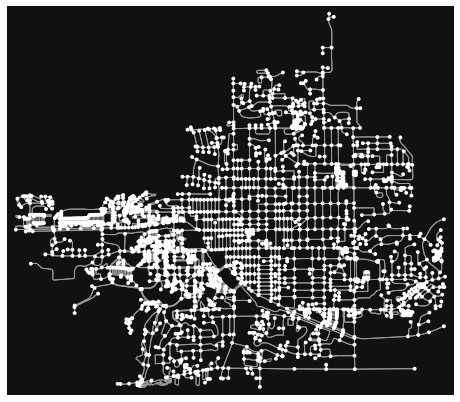

In [2]:
place = 'Moscow, Idaho'
G = ox.graph_from_place(place)
fig, ax = ox.plot_graph(G)

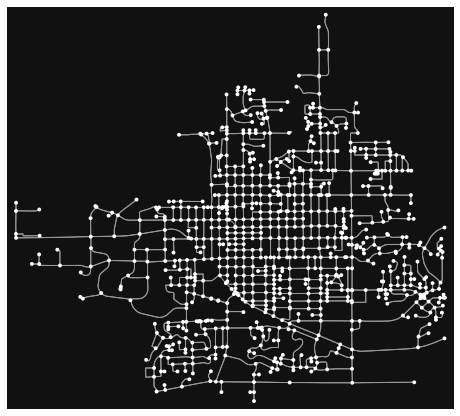

In [3]:
# Specify what kind of streets/routes/graph you want to work with, using network_type
G = ox.graph_from_place(place, network_type='drive')
fig, ax = ox.plot_graph(G)

### Visually compare 1 square mile of street networks

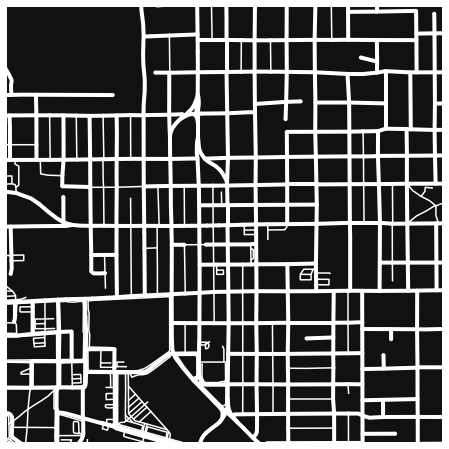

In [56]:
home_of_vandals = 'moscow, idaho'#'University of Idaho, USA'
fig, ax = ox.plot_figure_ground(address=home_of_vandals, network_type='walk')

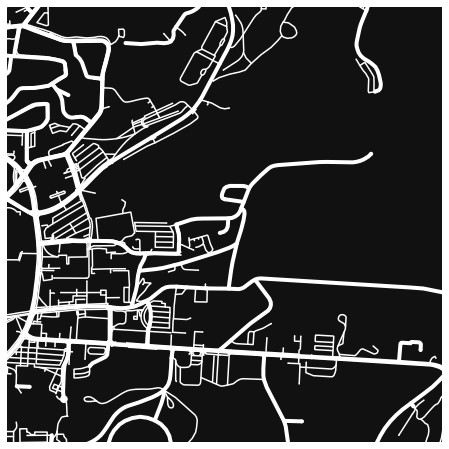

In [5]:
other_school = 'Washington State University'
fig, ax = ox.plot_figure_ground(address=other_school, network_type='walk')

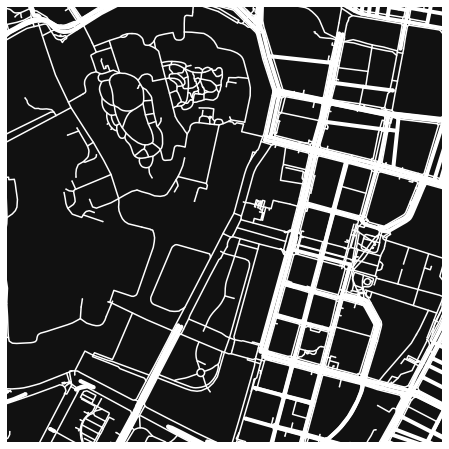

In [10]:
fig, ax = ox.plot_figure_ground(address="Tokyo", network_type='walk')

### Getting quantitative values out of osmnx:

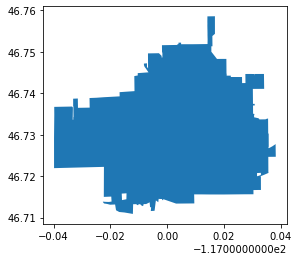

In [12]:
outline = ox.geocode_to_gdf(place)
ax = outline.plot()

### What data type is `outline`? Where have we seen this before?

In [13]:
type(outline)

geopandas.geodataframe.GeoDataFrame

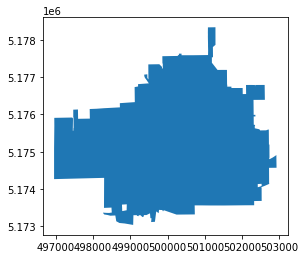

In [14]:
outline_proj = ox.project_gdf(outline)
ax = outline_proj.plot()

In [15]:
outline_proj

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((496952.671 5175090.022, 496952.712 5...",46.758608,46.710886,-116.961777,-117.039882,282418438,relation,121430,46.732388,-117.000165,"Moscow, Latah County, Idaho, United States",boundary,administrative,0.722635


In [20]:
outline_proj.area/1e6

0    17.887805
dtype: float64

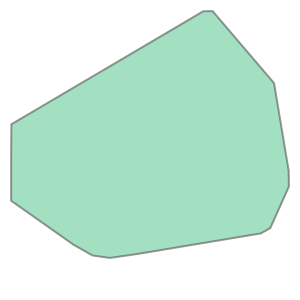

In [17]:
outline_proj.unary_union.convex_hull

In [19]:
# What is the convex outline that encloses the place?
outline_proj.unary_union.convex_hull.area/1e6

22.31455827944788

In [24]:
G_proj = ox.project_graph(G)

In [25]:
nodes, edges = ox.graph_to_gdfs(G_proj)

In [26]:
nodes

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
129688704,5.174244e+06,500438.402619,1,-116.994263,46.721747,NaN,POINT (500438.403 5174243.645)
3445469033,5.174160e+06,500358.786253,3,-116.995305,46.720997,NaN,POINT (500358.786 5174160.300)
129688774,5.174136e+06,500246.403360,1,-116.996776,46.720781,turning_circle,POINT (500246.403 5174136.281)
129688787,5.174268e+06,500193.645890,3,-116.997466,46.721966,NaN,POINT (500193.646 5174267.957)
129821668,5.174268e+06,500287.029983,3,-116.996244,46.721965,NaN,POINT (500287.030 5174267.850)
...,...,...,...,...,...,...,...
7895349889,5.174597e+06,502637.917970,1,-116.965479,46.724926,turning_circle,POINT (502637.918 5174597.462)
7895349898,5.174466e+06,502679.278729,1,-116.964939,46.723744,turning_circle,POINT (502679.279 5174466.135)
7895349905,5.175485e+06,501967.316263,1,-116.974251,46.732913,NaN,POINT (501967.316 5175484.707)


In [27]:
edges

osmid lanes                name       highway  \
u          v          key                                                      
129688704  3445469033 0    337458522     2         Rowe Street   residential   
3445469033 129688704  0    337458522     2         Rowe Street   residential   
           129863597  0    339627360     2  Indian Hills Drive   residential   
           129863586  0    339627360     2  Indian Hills Drive   residential   
129688774  129688787  0    337402633   NaN     Hawthorne Drive   residential   
...                              ...   ...                 ...           ...   
7895349898 7895349890 0    846255188   NaN       Hampton Court   residential   
7895349905 7895349913 0    846255189   NaN     East 3rd Street   residential   
7895349909 7895349915 0    846255189   NaN     East 3rd Street   residential   
8395686180 2216528032 0    903995063     1                 NaN  primary_link   
           129866714  0    903995065     2   North Main Street       primary   

                           oneway   length  \
u          v          key                    
129688704  3445469033 0     False  240.774   
3445469033 129688704  0     False  240.774   
           129863597  0     False   82.569   
           129863586  0     False  123.717   
129688774  129688787  0     False  156.424   
...                           ...      ...   
7895349898 7895349890 0     False  136.863   
7895349905 7895349913 0     False   15.769   
7895349909 7895349915 0     False   51.905   
8395686180 2216528032 0      True   47.221   
           129866714  0      True   36.997   

                                                                    geometry  \
u          v          key                                                      
129688704  3445469033 0    LINESTRING (500438.403 5174243.645, 500432.617...   
3445469033 129688704  0    LINESTRING (500358.786 5174160.300, 500372.270...   
           129863597  0    LINESTRING (500358.786 5174160.300, 500356.370...   
           129863586  0    LINESTRING (500358.786 5174160.300, 500357.618...   
129688774  129688787  0    LINESTRING (500246.403 5174136.281, 500242.406...   
...                                                                      ...   
7895349898 7895349890 0    LINESTRING (502679.279 5174466.135, 502685.287...   
7895349905 7895349913 0    LINESTRING (501967.316 5175484.707, 501978.116...   
7895349909 7895349915 0    LINESTRING (502219.012 5175444.280, 502167.005...   
8395686180 2216528032 0    LINESTRING (499888.502 5175798.515, 499886.188...   
           129866714  0    LINESTRING (499888.502 5175798.515, 499888.419...   

                          access    ref maxspeed bridge junction  
u          v          key                                         
129688704  3445469033 0      NaN    NaN      NaN    NaN      NaN  
3445469033 129688704  0      NaN    NaN      NaN    NaN      NaN  
           129863597  0      NaN    NaN      NaN    NaN      NaN  
           129863586  0      NaN    NaN      NaN    NaN      NaN  
129688774  129688787  0      NaN    NaN      NaN    NaN      NaN  
...                          ...    ...      ...    ...      ...  
7895349898 7895349890 0      NaN    NaN      NaN    NaN      NaN  
7895349905 7895349913 0      NaN    NaN      NaN    NaN      NaN  
7895349909 7895349915 0      NaN    NaN      NaN    NaN      NaN  
8395686180 2216528032 0      NaN    NaN      NaN    NaN      NaN  
           129866714  0      NaN  US 95   25 mph    NaN      NaN  

[2216 rows x 12 columns]

In [51]:
# what sized area does our network cover in square meters?

print(place)
print(ox.project_gdf( ox.geocode_to_gdf(place) ).area)
G = ox.graph_from_place(place)

G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
#     # nodes_proj = ox.graph_to_gdfs(G, edges=False)
#     print(nodes_proj)
area_series = ox.project_gdf(ox.geocode_to_gdf(place)).area # Returns a pandas series
graph_area_sm = area_series.iloc[0] # define the area of the city in square meters, out of the pandas series
print('Area in square kilometers:', graph_area_sm/1e6)

Moscow, Idaho
0    1.788780e+07
dtype: float64
Area in square kilometers: 17.88780473939978


In [52]:
# graph_area_sm.iloc[0]

In [53]:
stats = ox.basic_stats(G_proj, area=graph_area_sm)
print(stats.keys())
print()
print(stats)

dict_keys(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg', 'streets_per_node_avg', 'streets_per_node_counts', 'streets_per_node_proportions', 'intersection_count', 'street_length_total', 'street_segment_count', 'street_length_avg', 'circuity_avg', 'self_loop_proportion', 'node_density_km', 'intersection_density_km', 'edge_density_km', 'street_density_km'])

{'n': 2553, 'm': 6893, 'k_avg': 5.399921660791226, 'edge_length_total': 518131.6570000017, 'edge_length_avg': 75.16780168286692, 'streets_per_node_avg': 2.8112025068546806, 'streets_per_node_counts': {0: 0, 1: 472, 2: 10, 3: 1609, 4: 452, 5: 10}, 'streets_per_node_proportions': {0: 0.0, 1: 0.18488053270661967, 2: 0.0039169604386995694, 3: 0.6302389345867607, 4: 0.17704661182922052, 5: 0.0039169604386995694}, 'intersection_count': 2081, 'street_length_total': 266051.0919999996, 'street_segment_count': 3568, 'street_length_avg': 74.5658890134528, 'circuity_avg': 1.1130919509512507, 'self_loop_proportion': 0.0064461883408071

In [54]:
stats['edge_length_total']

518131.6570000017

In [55]:
stats['street_length_total']

266051.0919999996

### Do Moscow, Pullman, Troy, or Deary have the greatest length of streets, and street density?

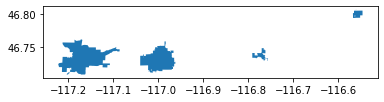

In [58]:
places = ['Pullman, WA', 'Moscow, ID', 'Troy, ID', 'Deary, ID']
outline = ox.geocode_to_gdf(places)
ax = outline.plot()

### Find the center (i.e., centroid of each city)

### Create a rectangle (a shapely polygon) with dimensions of 1 km by 1km, centered on the centroid of each city

### Within your 1 square km square, centered in the middle of the city, which city has the greatest street density?

### Starting in the center of Boise, how does street density change as you move west or south?